# <center> Toy Detector </center>

<img src="images/toyd.png" width = "100%">

## Imports

In [1]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
import math

rng = numpy.random # random number generator

## Settings

In [2]:
### DETECTOR ###

dim = [100,50]      # dimension [width, height]
N = dim[0] * dim[1] # number of blocks in the detector

### EVENT ###

nTracks = 5 # maximum no. of tracks

## Event

In [3]:
class Event:
    # initialize with random vertex and generate tracks
    def __init__ (self):
        # vertex = [x,y]
        self.vertex =  dim * rng.sample(2)
        self.vertex[1] = dim[1] / 2 # in this version all vertices at y-center
        # each event has random number of tracks
        self.tracks = [self.genTrack() for i in range(rng.randint(2,nTracks))]
        # data represents as array of 0 (no track) and 1 (track) points in the detector
        self.data = [0] * N
        # fill data with tracks
        for t in self.tracks: self.genData(t[0], t[1])
    # generate track (random line coming from vertex)
    def genTrack (self):
        # y = ax + b
        a = 2.0 * rng.sample() - 1.0
        b = self.vertex[1] - a * self.vertex[0]
        return [a,b]
    # generate data from tracks
    def genData (self, a, b):
        # track starts in the vertex
        start = int(self.vertex[0])
        # track length is random (but not smaller than 5)
        end = start + int((dim[0] - start) * rng.sample())
        # "convert" track to detector points
        for x in range(start, end):
            y = int(a * x + b)  # round y
            if y < 0 or y >= dim[1]: break
            self.data[x + y * dim[0]] = 1

## Event display

In [4]:
class EventDisplay:
    def __init__(self, a = 1, b = 1):
        fig, plots = plt.subplots(a,b)                      # create a axb grid of plots
        fig.set_size_inches((a, b) * fig.get_size_inches()) # adjust horizontal size 
        for i in range(a):
            for j in range(b):
                self.showEvent(plots[i][j], Event())
        plt.show()
    def showEvent (self, plot, e):
        # axis ranges
        plot.set_xlim([0,dim[0]])
        plot.set_ylim([0,dim[1]])
        # ticks
        plot.grid(b=True, which='major', color='k', linestyle='-')
        plot.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.2)
        plot.minorticks_on()
        # data
        X = []
        Y = []
        for i in range(dim[0]):
            for j in range(dim[1]):
                if e.data[i + dim[0] * j]:
                    X.append(i)
                    Y.append(j)
        plot.scatter(X, Y, color = 'k', marker = 's')
        # true tracks 
        x = numpy.arange(e.vertex[0], dim[0], 1)
        for t in e.tracks:
            plot.plot(x, t[0] * x + t[1], 'b')
        # vetex
        plot.scatter(e.vertex[0], e.vertex[1], color = 'r', marker = 's')

## Event examples

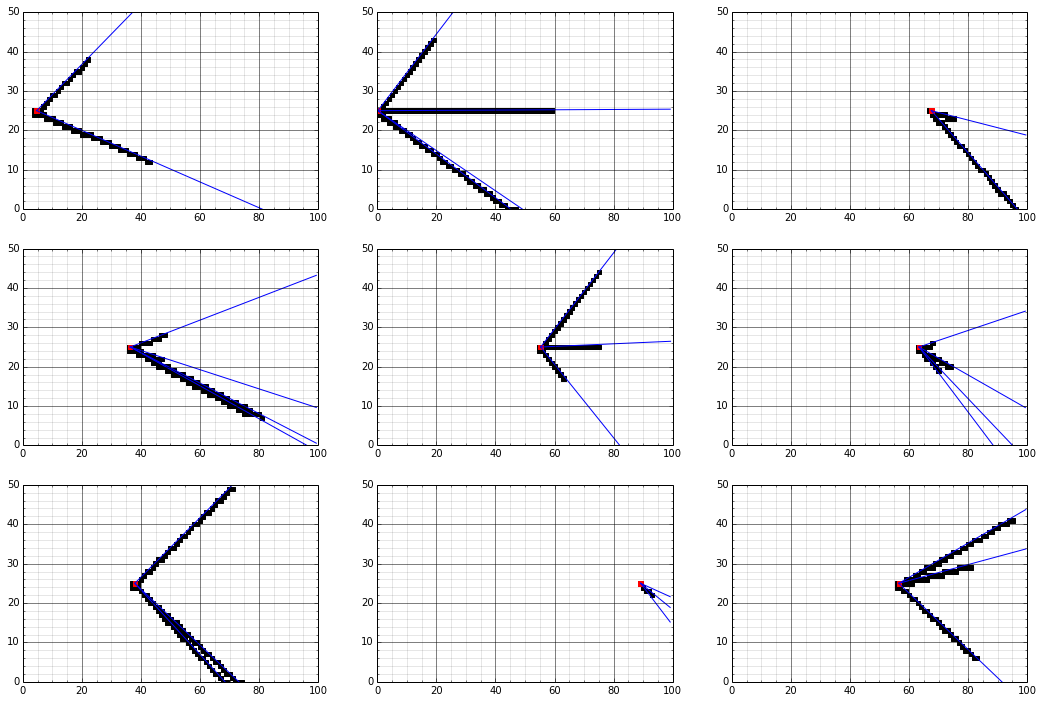

<__main__.EventDisplay instance at 0x7fdc43c7cea8>

In [5]:
EventDisplay(3,3)

## Full code to run on  grid

https://github.com/TomaszGolan/mlScratchpad/blob/master/10_theano_toy_detector.py

Results:

In [ ]:
Epoch: 1, cost = 0.001240
Epoch: 2, cost = 0.002893
Epoch: 3, cost = 0.003003
Epoch: 4, cost = 0.002792
Epoch: 5, cost = 0.002170
Epoch: 6, cost = 0.002202
Epoch: 7, cost = 0.003291
Epoch: 8, cost = 0.005907
Epoch: 9, cost = 0.019042
Epoch: 10, cost = 0.026370

Reconstruted events: 43.90%
	 within 1 planes: 13.300000%
	 within 2 planes: 10.000000%
	 within 3 planes: 7.500000%
	 within 4 planes: 7.200000%
	 within 5 planes: 5.900000%

Epoch: 11, cost = 0.027898
Epoch: 12, cost = 0.029723
Epoch: 13, cost = 0.030550
Epoch: 14, cost = 0.031496
Epoch: 15, cost = 0.031119
Epoch: 16, cost = 0.031325
Epoch: 17, cost = 0.031232
Epoch: 18, cost = 0.031426
Epoch: 19, cost = 0.031666
Epoch: 20, cost = 0.031602

Reconstruted events: 52.20%
	 within 1 planes: 12.400000%
	 within 2 planes: 13.100000%
	 within 3 planes: 11.400000%
	 within 4 planes: 7.100000%
	 within 5 planes: 8.200000%

Epoch: 21, cost = 0.031348
Epoch: 22, cost = 0.031554
Epoch: 23, cost = 0.031627
Epoch: 24, cost = 0.031989
Epoch: 25, cost = 0.033325
Epoch: 26, cost = 0.035037
Epoch: 27, cost = 0.036069
Epoch: 28, cost = 0.036300
Epoch: 29, cost = 0.036034
Epoch: 30, cost = 0.035018

Reconstruted events: 52.90%
	 within 1 planes: 14.800000%
	 within 2 planes: 12.000000%
	 within 3 planes: 9.800000%
	 within 4 planes: 8.700000%
	 within 5 planes: 7.600000%

Epoch: 31, cost = 0.032845
Epoch: 32, cost = 0.028074
Epoch: 33, cost = 0.017479
Epoch: 34, cost = 0.002397
Epoch: 35, cost = 0.000866
Epoch: 36, cost = 0.004548
Epoch: 37, cost = 0.006696
Epoch: 38, cost = 0.007563
Epoch: 39, cost = 0.007621
Epoch: 40, cost = 0.007297

Reconstruted events: 52.30%
	 within 1 planes: 15.200000%
	 within 2 planes: 11.700000%
	 within 3 planes: 6.900000%
	 within 4 planes: 10.600000%
	 within 5 planes: 7.900000%

Epoch: 41, cost = 0.007111
Epoch: 42, cost = 0.006986
Epoch: 43, cost = 0.006847
Epoch: 44, cost = 0.006686
Epoch: 45, cost = 0.006337
Epoch: 46, cost = 0.005834
Epoch: 47, cost = 0.005424
Epoch: 48, cost = 0.005140
Epoch: 49, cost = 0.004963
Epoch: 50, cost = 0.004882

Reconstruted events: 53.90%
	 within 1 planes: 16.500000%
	 within 2 planes: 10.800000%
	 within 3 planes: 8.700000%
	 within 4 planes: 10.100000%
	 within 5 planes: 7.800000%

Epoch: 51, cost = 0.004855
Epoch: 52, cost = 0.004847
Epoch: 53, cost = 0.004840
Epoch: 54, cost = 0.004834
Epoch: 55, cost = 0.004812
Epoch: 56, cost = 0.004721
Epoch: 57, cost = 0.004658
Epoch: 58, cost = 0.004643
Epoch: 59, cost = 0.004640
Epoch: 60, cost = 0.004626

Reconstruted events: 57.10%
	 within 1 planes: 16.900000%
	 within 2 planes: 11.600000%
	 within 3 planes: 10.400000%
	 within 4 planes: 10.900000%
	 within 5 planes: 7.300000%

Epoch: 61, cost = 0.004618
Epoch: 62, cost = 0.004616
Epoch: 63, cost = 0.004615
Epoch: 64, cost = 0.004620
Epoch: 65, cost = 0.004625
Epoch: 66, cost = 0.004621
Epoch: 67, cost = 0.004612
Epoch: 68, cost = 0.004596
Epoch: 69, cost = 0.004571
Epoch: 70, cost = 0.004535

Reconstruted events: 60.70%
	 within 1 planes: 18.500000%
	 within 2 planes: 11.700000%
	 within 3 planes: 12.600000%
	 within 4 planes: 9.600000%
	 within 5 planes: 8.300000%

Epoch: 71, cost = 0.004491
Epoch: 72, cost = 0.004449
Epoch: 73, cost = 0.004419
Epoch: 74, cost = 0.004400
Epoch: 75, cost = 0.004386
Epoch: 76, cost = 0.004374
Epoch: 77, cost = 0.004365
Epoch: 78, cost = 0.004369
Epoch: 79, cost = 0.004384
Epoch: 80, cost = 0.004401

Reconstruted events: 63.90%
	 within 1 planes: 20.600000%
	 within 2 planes: 11.900000%
	 within 3 planes: 14.200000%
	 within 4 planes: 10.400000%
	 within 5 planes: 6.800000%

Epoch: 81, cost = 0.004417
Epoch: 82, cost = 0.004428
Epoch: 83, cost = 0.004425
Epoch: 84, cost = 0.004401
Epoch: 85, cost = 0.004351
Epoch: 86, cost = 0.004276
Epoch: 87, cost = 0.004179
Epoch: 88, cost = 0.004061
Epoch: 89, cost = 0.003924
Epoch: 90, cost = 0.003767

Reconstruted events: 67.60%
	 within 1 planes: 21.200000%
	 within 2 planes: 15.100000%
	 within 3 planes: 14.000000%
	 within 4 planes: 9.600000%
	 within 5 planes: 7.700000%

Epoch: 91, cost = 0.003588
Epoch: 92, cost = 0.003384
Epoch: 93, cost = 0.003162
Epoch: 94, cost = 0.002931
Epoch: 95, cost = 0.002711
Epoch: 96, cost = 0.002505
Epoch: 97, cost = 0.002294
Epoch: 98, cost = 0.002073
Epoch: 99, cost = 0.001863
Epoch: 100, cost = 0.001680

Reconstruted events: 73.60%
	 within 1 planes: 25.500000%
	 within 2 planes: 16.700000%
	 within 3 planes: 14.600000%
	 within 4 planes: 10.500000%
	 within 5 planes: 6.300000%

Epoch: 101, cost = 0.001528
Epoch: 102, cost = 0.001398
Epoch: 103, cost = 0.001283
Epoch: 104, cost = 0.001181
Epoch: 105, cost = 0.001089
Epoch: 106, cost = 0.001001
Epoch: 107, cost = 0.000915
Epoch: 108, cost = 0.000835
Epoch: 109, cost = 0.000765
Epoch: 110, cost = 0.000706

Reconstruted events: 78.00%
	 within 1 planes: 29.500000%
	 within 2 planes: 19.600000%
	 within 3 planes: 14.300000%
	 within 4 planes: 8.600000%
	 within 5 planes: 6.000000%

Epoch: 111, cost = 0.000658
Epoch: 112, cost = 0.000620
Epoch: 113, cost = 0.000591
Epoch: 114, cost = 0.000567
Epoch: 115, cost = 0.000548
Epoch: 116, cost = 0.000534
Epoch: 117, cost = 0.000525
Epoch: 118, cost = 0.000523
Epoch: 119, cost = 0.000526
Epoch: 120, cost = 0.000535

Reconstruted events: 80.30%
	 within 1 planes: 33.200000%
	 within 2 planes: 20.400000%
	 within 3 planes: 12.400000%
	 within 4 planes: 9.100000%
	 within 5 planes: 5.200000%

Epoch: 121, cost = 0.000545
Epoch: 122, cost = 0.000555
Epoch: 123, cost = 0.000558
Epoch: 124, cost = 0.000553
Epoch: 125, cost = 0.000538
Epoch: 126, cost = 0.000515
Epoch: 127, cost = 0.000486
Epoch: 128, cost = 0.000459
Epoch: 129, cost = 0.000439
Epoch: 130, cost = 0.000426

Reconstruted events: 82.10%
	 within 1 planes: 35.600000%
	 within 2 planes: 21.300000%
	 within 3 planes: 12.000000%
	 within 4 planes: 7.900000%
	 within 5 planes: 5.300000%

Epoch: 131, cost = 0.000416
Epoch: 132, cost = 0.000406
Epoch: 133, cost = 0.000395
Epoch: 134, cost = 0.000383
Epoch: 135, cost = 0.000368
Epoch: 136, cost = 0.000351
Epoch: 137, cost = 0.000335
Epoch: 138, cost = 0.000316
Epoch: 139, cost = 0.000300
Epoch: 140, cost = 0.000289

Reconstruted events: 82.90%
	 within 1 planes: 35.900000%
	 within 2 planes: 22.600000%
	 within 3 planes: 11.500000%
	 within 4 planes: 8.000000%
	 within 5 planes: 4.900000%

Epoch: 141, cost = 0.000285
Epoch: 142, cost = 0.000283
Epoch: 143, cost = 0.000282
Epoch: 144, cost = 0.000283
Epoch: 145, cost = 0.000286
Epoch: 146, cost = 0.000290
Epoch: 147, cost = 0.000295
Epoch: 148, cost = 0.000297
Epoch: 149, cost = 0.000295
Epoch: 150, cost = 0.000289

Reconstruted events: 84.50%
	 within 1 planes: 38.800000%
	 within 2 planes: 21.100000%
	 within 3 planes: 11.800000%
	 within 4 planes: 8.600000%
	 within 5 planes: 4.200000%

Epoch: 151, cost = 0.000280
Epoch: 152, cost = 0.000269
Epoch: 153, cost = 0.000255
Epoch: 154, cost = 0.000239
Epoch: 155, cost = 0.000221
Epoch: 156, cost = 0.000205
Epoch: 157, cost = 0.000195
Epoch: 158, cost = 0.000187
Epoch: 159, cost = 0.000180
Epoch: 160, cost = 0.000174

Reconstruted events: 84.60%
	 within 1 planes: 38.500000%
	 within 2 planes: 22.300000%
	 within 3 planes: 12.500000%
	 within 4 planes: 7.400000%
	 within 5 planes: 3.900000%

Epoch: 161, cost = 0.000172
Epoch: 162, cost = 0.000175
Epoch: 163, cost = 0.000176
Epoch: 164, cost = 0.000171
Epoch: 165, cost = 0.000165
Epoch: 166, cost = 0.000157
Epoch: 167, cost = 0.000147
Epoch: 168, cost = 0.000137
Epoch: 169, cost = 0.000126
Epoch: 170, cost = 0.000116

Reconstruted events: 85.50%
	 within 1 planes: 38.900000%
	 within 2 planes: 22.800000%
	 within 3 planes: 13.000000%
	 within 4 planes: 7.100000%
	 within 5 planes: 3.700000%

Epoch: 171, cost = 0.000106
Epoch: 172, cost = 0.000096
Epoch: 173, cost = 0.000086
Epoch: 174, cost = 0.000073
Epoch: 175, cost = 0.000058
Epoch: 176, cost = 0.000043
Epoch: 177, cost = 0.000033
Epoch: 178, cost = 0.000028
Epoch: 179, cost = 0.000026
Epoch: 180, cost = 0.000026

Reconstruted events: 86.40%
	 within 1 planes: 38.900000%
	 within 2 planes: 23.900000%
	 within 3 planes: 13.100000%
	 within 4 planes: 6.700000%
	 within 5 planes: 3.800000%

Epoch: 181, cost = 0.000027
Epoch: 182, cost = 0.000028
Epoch: 183, cost = 0.000030
Epoch: 184, cost = 0.000032
Epoch: 185, cost = 0.000034
Epoch: 186, cost = 0.000038
Epoch: 187, cost = 0.000042
Epoch: 188, cost = 0.000047
Epoch: 189, cost = 0.000053
Epoch: 190, cost = 0.000060

Reconstruted events: 86.90%
	 within 1 planes: 40.300000%
	 within 2 planes: 23.200000%
	 within 3 planes: 13.300000%
	 within 4 planes: 7.200000%
	 within 5 planes: 2.900000%

Epoch: 191, cost = 0.000066
Epoch: 192, cost = 0.000072
Epoch: 193, cost = 0.000078
Epoch: 194, cost = 0.000083
Epoch: 195, cost = 0.000089
Epoch: 196, cost = 0.000095
Epoch: 197, cost = 0.000101
Epoch: 198, cost = 0.000106
Epoch: 199, cost = 0.000112
Epoch: 200, cost = 0.000119

Reconstruted events: 87.40%
	 within 1 planes: 40.500000%
	 within 2 planes: 24.900000%
	 within 3 planes: 13.200000%
	 within 4 planes: 6.000000%
	 within 5 planes: 2.800000%

Epoch: 201, cost = 0.000127
Epoch: 202, cost = 0.000136
Epoch: 203, cost = 0.000145
Epoch: 204, cost = 0.000154
Epoch: 205, cost = 0.000160
Epoch: 206, cost = 0.000163
Epoch: 207, cost = 0.000165
Epoch: 208, cost = 0.000165
Epoch: 209, cost = 0.000165
Epoch: 210, cost = 0.000163

Reconstruted events: 88.10%
	 within 1 planes: 41.100000%
	 within 2 planes: 25.300000%
	 within 3 planes: 12.300000%
	 within 4 planes: 5.800000%
	 within 5 planes: 3.600000%

Epoch: 211, cost = 0.000160
Epoch: 212, cost = 0.000156
Epoch: 213, cost = 0.000152
Epoch: 214, cost = 0.000149
Epoch: 215, cost = 0.000146
Epoch: 216, cost = 0.000146
Epoch: 217, cost = 0.000150
Epoch: 218, cost = 0.000156
Epoch: 219, cost = 0.000163
Epoch: 220, cost = 0.000170

Reconstruted events: 89.00%
	 within 1 planes: 41.400000%
	 within 2 planes: 26.200000%
	 within 3 planes: 12.000000%
	 within 4 planes: 5.400000%
	 within 5 planes: 4.000000%

Epoch: 221, cost = 0.000176
Epoch: 222, cost = 0.000181
Epoch: 223, cost = 0.000186
Epoch: 224, cost = 0.000190
Epoch: 225, cost = 0.000193
Epoch: 226, cost = 0.000195
Epoch: 227, cost = 0.000196
Epoch: 228, cost = 0.000198
Epoch: 229, cost = 0.000200
Epoch: 230, cost = 0.000203

Reconstruted events: 90.20%
	 within 1 planes: 42.600000%
	 within 2 planes: 25.500000%
	 within 3 planes: 12.300000%
	 within 4 planes: 5.300000%
	 within 5 planes: 4.500000%

Epoch: 231, cost = 0.000205
Epoch: 232, cost = 0.000208
Epoch: 233, cost = 0.000210
Epoch: 234, cost = 0.000212
Epoch: 235, cost = 0.000214
Epoch: 236, cost = 0.000214
Epoch: 237, cost = 0.000214
Epoch: 238, cost = 0.000213
Epoch: 239, cost = 0.000211
Epoch: 240, cost = 0.000208

Reconstruted events: 91.00%
	 within 1 planes: 42.700000%
	 within 2 planes: 25.300000%
	 within 3 planes: 12.400000%
	 within 4 planes: 6.200000%
	 within 5 planes: 4.400000%

Epoch: 241, cost = 0.000206
Epoch: 242, cost = 0.000203
Epoch: 243, cost = 0.000200
Epoch: 244, cost = 0.000198
Epoch: 245, cost = 0.000195
Epoch: 246, cost = 0.000192
Epoch: 247, cost = 0.000189
Epoch: 248, cost = 0.000184
Epoch: 249, cost = 0.000178
Epoch: 250, cost = 0.000170

Reconstruted events: 91.20%
	 within 1 planes: 43.400000%
	 within 2 planes: 25.100000%
	 within 3 planes: 12.500000%
	 within 4 planes: 6.800000%
	 within 5 planes: 3.400000%

Epoch: 251, cost = 0.000162
Epoch: 252, cost = 0.000156
Epoch: 253, cost = 0.000156
Epoch: 254, cost = 0.000162
Epoch: 255, cost = 0.000171
Epoch: 256, cost = 0.000178
Epoch: 257, cost = 0.000182
Epoch: 258, cost = 0.000184
Epoch: 259, cost = 0.000184
Epoch: 260, cost = 0.000183

Reconstruted events: 91.80%
	 within 1 planes: 43.700000%
	 within 2 planes: 24.900000%
	 within 3 planes: 13.200000%
	 within 4 planes: 6.700000%
	 within 5 planes: 3.300000%

Epoch: 261, cost = 0.000181
Epoch: 262, cost = 0.000179
Epoch: 263, cost = 0.000176
Epoch: 264, cost = 0.000173
Epoch: 265, cost = 0.000169
Epoch: 266, cost = 0.000166
Epoch: 267, cost = 0.000161
Epoch: 268, cost = 0.000156
Epoch: 269, cost = 0.000152
Epoch: 270, cost = 0.000148

Reconstruted events: 92.00%
	 within 1 planes: 44.500000%
	 within 2 planes: 24.300000%
	 within 3 planes: 13.200000%
	 within 4 planes: 6.800000%
	 within 5 planes: 3.200000%

Epoch: 271, cost = 0.000144
Epoch: 272, cost = 0.000141
Epoch: 273, cost = 0.000138
Epoch: 274, cost = 0.000135
Epoch: 275, cost = 0.000132
Epoch: 276, cost = 0.000129
Epoch: 277, cost = 0.000126
Epoch: 278, cost = 0.000124
Epoch: 279, cost = 0.000121
Epoch: 280, cost = 0.000118

Reconstruted events: 93.00%
	 within 1 planes: 45.200000%
	 within 2 planes: 25.000000%
	 within 3 planes: 12.700000%
	 within 4 planes: 7.200000%
	 within 5 planes: 2.900000%

Epoch: 281, cost = 0.000116
Epoch: 282, cost = 0.000114
Epoch: 283, cost = 0.000112
Epoch: 284, cost = 0.000109
Epoch: 285, cost = 0.000107
Epoch: 286, cost = 0.000104
Epoch: 287, cost = 0.000102
Epoch: 288, cost = 0.000100
Epoch: 289, cost = 0.000098
Epoch: 290, cost = 0.000097

Reconstruted events: 93.50%
	 within 1 planes: 44.900000%
	 within 2 planes: 25.700000%
	 within 3 planes: 12.400000%
	 within 4 planes: 7.100000%
	 within 5 planes: 3.400000%

Epoch: 291, cost = 0.000095
Epoch: 292, cost = 0.000094
Epoch: 293, cost = 0.000093
Epoch: 294, cost = 0.000091
Epoch: 295, cost = 0.000090
Epoch: 296, cost = 0.000089
Epoch: 297, cost = 0.000088
Epoch: 298, cost = 0.000087
Epoch: 299, cost = 0.000087
Epoch: 300, cost = 0.000086

Reconstruted events: 94.00%
	 within 1 planes: 44.100000%
	 within 2 planes: 26.700000%
	 within 3 planes: 12.500000%
	 within 4 planes: 6.800000%
	 within 5 planes: 3.900000%

Epoch: 301, cost = 0.000086
Epoch: 302, cost = 0.000086
Epoch: 303, cost = 0.000086
Epoch: 304, cost = 0.000086
Epoch: 305, cost = 0.000086
Epoch: 306, cost = 0.000087
Epoch: 307, cost = 0.000087
Epoch: 308, cost = 0.000087
Epoch: 309, cost = 0.000087
Epoch: 310, cost = 0.000086

Reconstruted events: 94.30%
	 within 1 planes: 45.100000%
	 within 2 planes: 26.300000%
	 within 3 planes: 12.100000%
	 within 4 planes: 7.100000%
	 within 5 planes: 3.700000%

Epoch: 311, cost = 0.000085
Epoch: 312, cost = 0.000084
Epoch: 313, cost = 0.000082
Epoch: 314, cost = 0.000081
Epoch: 315, cost = 0.000081
Epoch: 316, cost = 0.000081
Epoch: 317, cost = 0.000083
Epoch: 318, cost = 0.000085
Epoch: 319, cost = 0.000087
Epoch: 320, cost = 0.000088

Reconstruted events: 94.40%
	 within 1 planes: 45.100000%
	 within 2 planes: 26.700000%
	 within 3 planes: 11.300000%
	 within 4 planes: 7.600000%
	 within 5 planes: 3.700000%

Epoch: 321, cost = 0.000090
Epoch: 322, cost = 0.000091
Epoch: 323, cost = 0.000093
Epoch: 324, cost = 0.000094
Epoch: 325, cost = 0.000095
Epoch: 326, cost = 0.000096
Epoch: 327, cost = 0.000097
Epoch: 328, cost = 0.000098
Epoch: 329, cost = 0.000098
Epoch: 330, cost = 0.000098

Reconstruted events: 94.30%
	 within 1 planes: 45.400000%
	 within 2 planes: 25.600000%
	 within 3 planes: 12.400000%
	 within 4 planes: 7.300000%
	 within 5 planes: 3.600000%

Epoch: 331, cost = 0.000098
Epoch: 332, cost = 0.000097
Epoch: 333, cost = 0.000097
Epoch: 334, cost = 0.000096
Epoch: 335, cost = 0.000095
Epoch: 336, cost = 0.000093
Epoch: 337, cost = 0.000092
Epoch: 338, cost = 0.000090
Epoch: 339, cost = 0.000088
Epoch: 340, cost = 0.000086

Reconstruted events: 94.60%
	 within 1 planes: 45.500000%
	 within 2 planes: 26.200000%
	 within 3 planes: 11.700000%
	 within 4 planes: 7.200000%
	 within 5 planes: 4.000000%

Epoch: 341, cost = 0.000084
Epoch: 342, cost = 0.000081
Epoch: 343, cost = 0.000079
Epoch: 344, cost = 0.000077
Epoch: 345, cost = 0.000074
Epoch: 346, cost = 0.000072
Epoch: 347, cost = 0.000070
Epoch: 348, cost = 0.000068
Epoch: 349, cost = 0.000066
Epoch: 350, cost = 0.000065

Reconstruted events: 95.30%
	 within 1 planes: 47.300000%
	 within 2 planes: 24.200000%
	 within 3 planes: 12.200000%
	 within 4 planes: 7.100000%
	 within 5 planes: 4.500000%

Epoch: 351, cost = 0.000064
Epoch: 352, cost = 0.000062
Epoch: 353, cost = 0.000061
Epoch: 354, cost = 0.000060
Epoch: 355, cost = 0.000059
Epoch: 356, cost = 0.000057
Epoch: 357, cost = 0.000056
Epoch: 358, cost = 0.000054
Epoch: 359, cost = 0.000053
Epoch: 360, cost = 0.000051

Reconstruted events: 95.50%
	 within 1 planes: 47.500000%
	 within 2 planes: 24.300000%
	 within 3 planes: 12.000000%
	 within 4 planes: 7.800000%
	 within 5 planes: 3.900000%

Epoch: 361, cost = 0.000050
Epoch: 362, cost = 0.000048
Epoch: 363, cost = 0.000046
Epoch: 364, cost = 0.000044
Epoch: 365, cost = 0.000043
Epoch: 366, cost = 0.000041
Epoch: 367, cost = 0.000039
Epoch: 368, cost = 0.000037
Epoch: 369, cost = 0.000035
Epoch: 370, cost = 0.000034

Reconstruted events: 95.40%
	 within 1 planes: 47.600000%
	 within 2 planes: 23.800000%
	 within 3 planes: 12.800000%
	 within 4 planes: 7.600000%
	 within 5 planes: 3.600000%

Epoch: 371, cost = 0.000032
Epoch: 372, cost = 0.000031
Epoch: 373, cost = 0.000029
Epoch: 374, cost = 0.000028
Epoch: 375, cost = 0.000027
Epoch: 376, cost = 0.000025
Epoch: 377, cost = 0.000024
Epoch: 378, cost = 0.000023
Epoch: 379, cost = 0.000022
Epoch: 380, cost = 0.000021

Reconstruted events: 95.70%
	 within 1 planes: 47.500000%
	 within 2 planes: 24.400000%
	 within 3 planes: 12.500000%
	 within 4 planes: 7.300000%
	 within 5 planes: 4.000000%

Epoch: 381, cost = 0.000020
Epoch: 382, cost = 0.000019
Epoch: 383, cost = 0.000018
Epoch: 384, cost = 0.000017
Epoch: 385, cost = 0.000016
Epoch: 386, cost = 0.000015
Epoch: 387, cost = 0.000014
Epoch: 388, cost = 0.000013
Epoch: 389, cost = 0.000013
Epoch: 390, cost = 0.000012

Reconstruted events: 95.60%
	 within 1 planes: 48.700000%
	 within 2 planes: 23.100000%
	 within 3 planes: 12.800000%
	 within 4 planes: 7.400000%
	 within 5 planes: 3.600000%

Epoch: 391, cost = 0.000011
Epoch: 392, cost = 0.000010
Epoch: 393, cost = 0.000009
Epoch: 394, cost = 0.000008
Epoch: 395, cost = 0.000007
Epoch: 396, cost = 0.000006
Epoch: 397, cost = 0.000006
Epoch: 398, cost = 0.000005
Epoch: 399, cost = 0.000004
Epoch: 400, cost = 0.000004

Reconstruted events: 95.50%
	 within 1 planes: 49.200000%
	 within 2 planes: 23.000000%
	 within 3 planes: 12.600000%
	 within 4 planes: 7.300000%
	 within 5 planes: 3.400000%
